In [1]:
# Import packages required for importing datasets
import pickle
import numpy as np

In [2]:
# Define function to read in pickled data from etl step
def readData(filename):
    with open(filename, 'rb') as f:
        return pickle.load(f)

In [3]:
# Read in training data
X_train1 = readData('X_train1.pickle')
X_train2 = readData('X_train2.pickle')
y_train = readData('y_train.pickle')
images_train = readData('images_train.pickle')
labels_train = readData('labels_train.pickle')

In [4]:
# Join the 2 parts of the training data
X_train = np.append(X_train1, X_train2, axis=0)
X_train.shape

(11034, 150, 150, 3)

In [6]:
# Read in test data
X_test = readData('X_test.pickle')
y_test = readData('y_test.pickle')
images_test = readData('images_test.pickle')
labels_test = readData('labels_test.pickle')

In [7]:
# Read in validation data
X_valid = readData('X_valid.pickle')
y_valid = readData('y_valid.pickle')
images_valid = readData('images_valid.pickle')
labels_valid = readData('labels_valid.pickle')

# Build first Convolutional Neural Network model

In [8]:
# Import required packages from keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, Flatten, MaxPool2D

Using TensorFlow backend.


In [9]:
# Get input shape from training data to define initial layer of neural net
input_shape = X_train[0].shape
input_shape

(150, 150, 3)

In [10]:
# Get number of classes from training labels to define final output layer of neural net
num_classes = len(set(labels_train))
num_classes

6

In [11]:
#create model
model = Sequential()
#add model layers
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPool2D(5, 5))
model.add(Conv2D(64, kernel_size=(5, 5), activation='relu'))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(6, 6))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 29, 29, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 64)        51264     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 23, 23, 128)       73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 21, 21, 128)       147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 128)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 3, 3, 128)         0         
__________

In [12]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
batch_size = 128
epochs = 12

In [14]:
model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_valid, y_valid))

Train on 11034 samples, validate on 3000 samples
Epoch 1/12
11034/11034 [==============================] - 574s 52ms/step - loss: 1.3591 - acc: 0.4302 - val_loss: 1.0940 - val_acc: 0.5517
Epoch 2/12
11034/11034 [==============================] - 607s 55ms/step - loss: 1.0549 - acc: 0.5759 - val_loss: 0.9448 - val_acc: 0.6403
Epoch 3/12
11034/11034 [==============================] - 564s 51ms/step - loss: 0.9068 - acc: 0.6576 - val_loss: 0.7561 - val_acc: 0.7197
Epoch 4/12
11034/11034 [==============================] - 530s 48ms/step - loss: 0.8190 - acc: 0.6964 - val_loss: 0.7368 - val_acc: 0.7190
Epoch 5/12
11034/11034 [==============================] - 579s 52ms/step - loss: 0.7322 - acc: 0.7316 - val_loss: 0.6308 - val_acc: 0.7697
Epoch 6/12
11034/11034 [==============================] - 651s 59ms/step - loss: 0.6822 - acc: 0.7513 - val_loss: 0.6320 - val_acc: 0.7643
Epoch 7/12
11034/11034 [==============================] - 650s 59ms/step - loss: 0.6582 - acc: 0.7657 - val_loss: 0.6

In [17]:
batch_size = 512
epochs = 2

In [18]:
hist = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_valid, y_valid))

Train on 11034 samples, validate on 3000 samples
Epoch 1/2
11034/11034 [==============================] - 666s 60ms/step - loss: 0.4851 - acc: 0.8325 - val_loss: 0.4588 - val_acc: 0.8357
Epoch 2/2
11034/11034 [==============================] - 574s 52ms/step - loss: 0.4509 - acc: 0.8395 - val_loss: 0.4774 - val_acc: 0.8310


In [20]:
model.pop()
model.pop()
model.pop()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 29, 29, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 64)        51264     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 23, 23, 128)       73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 21, 21, 128)       147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 128)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 3, 3, 128)         0         
__________

C:\Users\mattc\Anaconda3\lib\site-packages\keras\engine\training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


In [21]:
for l in model.layers:
    l.trainable = False
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 29, 29, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 64)        51264     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 23, 23, 128)       73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 21, 21, 128)       147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 128)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 3, 3, 128)         0         
__________

In [22]:

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 29, 29, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 64)        51264     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 23, 23, 128)       73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 21, 21, 128)       147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 128)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 3, 3, 128)         0         
__________

In [23]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [24]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 29, 29, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 64)        51264     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 23, 23, 128)       73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 21, 21, 128)       147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 128)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 3, 3, 128)         0         
__________

In [25]:
batch_size = 128
epochs = 3

In [26]:
hist =  model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_valid, y_valid))

Train on 11034 samples, validate on 3000 samples
Epoch 1/3
11034/11034 [==============================] - 183s 17ms/step - loss: 0.7657 - acc: 0.7361 - val_loss: 0.5163 - val_acc: 0.8267
Epoch 2/3
11034/11034 [==============================] - 193s 17ms/step - loss: 0.5538 - acc: 0.8181 - val_loss: 0.4817 - val_acc: 0.8333
Epoch 3/3
11034/11034 [==============================] - 196s 18ms/step - loss: 0.5213 - acc: 0.8261 - val_loss: 0.4822 - val_acc: 0.8370


In [27]:
batch_size = 512
epochs = 10
hist =  model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_valid, y_valid))

Train on 11034 samples, validate on 3000 samples
Epoch 1/10
11034/11034 [==============================] - 181s 16ms/step - loss: 0.4906 - acc: 0.8390 - val_loss: 0.4708 - val_acc: 0.8443
Epoch 2/10
11034/11034 [==============================] - 194s 18ms/step - loss: 0.4717 - acc: 0.8419 - val_loss: 0.4668 - val_acc: 0.8443
Epoch 3/10
11034/11034 [==============================] - 194s 18ms/step - loss: 0.4624 - acc: 0.8436 - val_loss: 0.4663 - val_acc: 0.8430
Epoch 4/10
11034/11034 [==============================] - 205s 19ms/step - loss: 0.4541 - acc: 0.8478 - val_loss: 0.4651 - val_acc: 0.8420
Epoch 5/10
11034/11034 [==============================] - 194s 18ms/step - loss: 0.4387 - acc: 0.8535 - val_loss: 0.4617 - val_acc: 0.8470
Epoch 6/10
11034/11034 [==============================] - 203s 18ms/step - loss: 0.4416 - acc: 0.8530 - val_loss: 0.4570 - val_acc: 0.8473
Epoch 7/10
11034/11034 [==============================] - 200s 18ms/step - loss: 0.4335 - acc: 0.8504 - val_loss: 0.4

In [28]:
for l in model.layers:
    l.trainable = True
model.compile(loss='categorical_crossentropy', optimizer='Adadelta', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 29, 29, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 64)        51264     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 23, 23, 128)       73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 21, 21, 128)       147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 128)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 3, 3, 128)         0         
__________

In [30]:
batch_size = 512
epochs = 3

In [31]:
hist =  model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_valid, y_valid))

Train on 11034 samples, validate on 3000 samples
Epoch 1/3
11034/11034 [==============================] - 555s 50ms/step - loss: 1.3038 - acc: 0.6542 - val_loss: 0.7806 - val_acc: 0.7447
Epoch 2/3
11034/11034 [==============================] - 547s 50ms/step - loss: 0.6590 - acc: 0.7840 - val_loss: 0.5912 - val_acc: 0.8047
Epoch 3/3
11034/11034 [==============================] - 547s 50ms/step - loss: 0.5638 - acc: 0.8101 - val_loss: 0.5193 - val_acc: 0.8247


In [46]:
from keras.models import load_model
model = load_model('model1.h5')

In [48]:
import random

for layer in model.layers:
    layer_name = layer.get_config()["name"]
    if layer_name.startswith("conv") or layer_name.startswith("dense"):
        layer.trainable = (random.random() > 0.75)
model.compile(loss='categorical_crossentropy', optimizer='Adadelta', metrics=['accuracy'])
model.summary()   

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 29, 29, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 64)        51264     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 23, 23, 128)       73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 21, 21, 128)       147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 128)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 3, 3, 128)         0         
__________

In [49]:
batch_size = 512
epochs = 3
hist =  model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_valid, y_valid))

Train on 11034 samples, validate on 3000 samples
Epoch 1/3
11034/11034 [==============================] - 312s 28ms/step - loss: 0.4888 - acc: 0.8368 - val_loss: 0.4944 - val_acc: 0.8250
Epoch 2/3
11034/11034 [==============================] - 325s 29ms/step - loss: 0.4724 - acc: 0.8428 - val_loss: 0.4650 - val_acc: 0.8413
Epoch 3/3
11034/11034 [==============================] - 348s 32ms/step - loss: 0.4860 - acc: 0.8337 - val_loss: 0.5535 - val_acc: 0.8080


In [32]:
# Save model current state
model.save("model1.h5")

In [44]:
#create model
model = Sequential()
#add model layers
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPool2D(3, 3))
model.add(Conv2D(64, kernel_size=(5, 5), activation='relu'))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(4, 4))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 146, 146, 32)      9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 44, 44, 64)        51264     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 42, 42, 128)       73856     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 40, 40, 32)        36896     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 10, 10, 32)        0         
__________

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, batch_size=batch_size,
          epochs=epochs, validation_data=(X_valid, y_valid))

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
score = model.evaluate(X_valid, y_valid, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [50]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.5314656008829673
Test accuracy: 0.8193333333333334


In [51]:
prob_valid = model.predict(X_valid)

In [52]:
prob_valid

array([[1.4232307e-03, 8.4629207e-04, 5.9484574e-04, 9.0586537e-01,
        7.4463971e-02, 1.6806182e-02],
       [2.4344017e-08, 1.4200904e-08, 3.8795132e-09, 9.9999940e-01,
        4.8922664e-07, 1.5994814e-07],
       [5.9150529e-01, 3.0437374e-01, 5.2400414e-02, 1.2684394e-02,
        1.4802023e-02, 2.4234166e-02],
       ...,
       [4.0567323e-04, 3.6320973e-05, 1.2128786e-04, 4.0833748e-04,
        9.7762316e-01, 2.1405233e-02],
       [2.1291955e-01, 2.6235661e-01, 4.4929668e-01, 2.1654055e-02,
        3.4642637e-02, 1.9130496e-02],
       [1.3855868e-02, 9.8573756e-01, 2.3629186e-04, 1.6287227e-05,
        1.0328129e-05, 1.4360338e-04]], dtype=float32)

In [53]:
pred_valid = np.argmax(prob_valid, axis=1)
pred_valid

array([3, 3, 0, ..., 4, 2, 1], dtype=int64)

In [54]:
classDict = {'glacier': 0, 'mountain': 1, 'sea': 2, 'forest': 3, 'street': 4, 'buildings': 5}

In [55]:
invertedClassDict = {value: key for key, value in classDict.items()}

In [56]:
[invertedClassDict[k] for k in pred_valid.tolist()]

['forest',
 'forest',
 'glacier',
 'forest',
 'buildings',
 'forest',
 'street',
 'buildings',
 'forest',
 'glacier',
 'mountain',
 'sea',
 'forest',
 'street',
 'buildings',
 'sea',
 'mountain',
 'street',
 'sea',
 'forest',
 'forest',
 'sea',
 'glacier',
 'forest',
 'sea',
 'forest',
 'mountain',
 'buildings',
 'glacier',
 'glacier',
 'forest',
 'buildings',
 'sea',
 'mountain',
 'buildings',
 'street',
 'street',
 'forest',
 'forest',
 'glacier',
 'street',
 'glacier',
 'buildings',
 'glacier',
 'street',
 'street',
 'glacier',
 'street',
 'buildings',
 'forest',
 'glacier',
 'sea',
 'street',
 'street',
 'mountain',
 'sea',
 'mountain',
 'mountain',
 'forest',
 'street',
 'mountain',
 'mountain',
 'forest',
 'sea',
 'sea',
 'glacier',
 'mountain',
 'mountain',
 'mountain',
 'street',
 'forest',
 'glacier',
 'buildings',
 'mountain',
 'sea',
 'glacier',
 'glacier',
 'sea',
 'glacier',
 'glacier',
 'forest',
 'forest',
 'sea',
 'forest',
 'forest',
 'buildings',
 'forest',
 'sea',
 '

'forest'

In [57]:
labels_valid

['street',
 'forest',
 'mountain',
 'forest',
 'buildings',
 'forest',
 'street',
 'buildings',
 'forest',
 'glacier',
 'mountain',
 'sea',
 'forest',
 'street',
 'buildings',
 'mountain',
 'mountain',
 'street',
 'sea',
 'forest',
 'forest',
 'sea',
 'sea',
 'forest',
 'sea',
 'forest',
 'street',
 'buildings',
 'glacier',
 'sea',
 'forest',
 'street',
 'glacier',
 'mountain',
 'buildings',
 'street',
 'street',
 'forest',
 'street',
 'glacier',
 'street',
 'glacier',
 'buildings',
 'glacier',
 'street',
 'street',
 'sea',
 'street',
 'buildings',
 'forest',
 'mountain',
 'sea',
 'street',
 'street',
 'mountain',
 'sea',
 'mountain',
 'mountain',
 'glacier',
 'street',
 'mountain',
 'mountain',
 'forest',
 'sea',
 'sea',
 'glacier',
 'mountain',
 'glacier',
 'mountain',
 'buildings',
 'forest',
 'glacier',
 'buildings',
 'mountain',
 'sea',
 'mountain',
 'glacier',
 'sea',
 'glacier',
 'sea',
 'buildings',
 'forest',
 'sea',
 'forest',
 'forest',
 'buildings',
 'forest',
 'sea',
 'mou

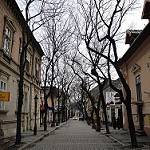

In [58]:
images_valid[0]

Predicted = forest, actual = street


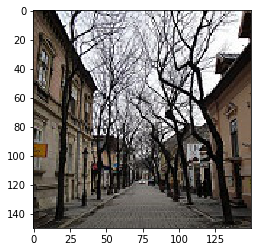

Predicted = glacier, actual = mountain


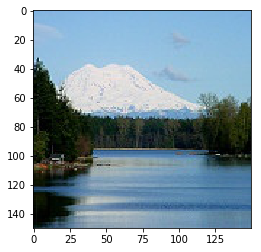

Predicted = sea, actual = mountain


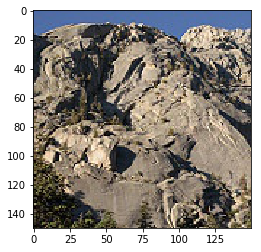

Predicted = glacier, actual = sea


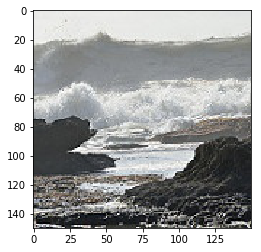

Predicted = mountain, actual = street


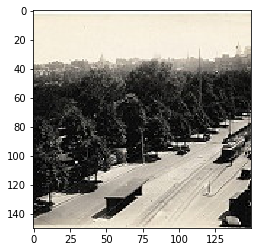

Predicted = glacier, actual = sea


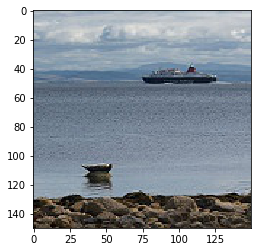

Predicted = buildings, actual = street


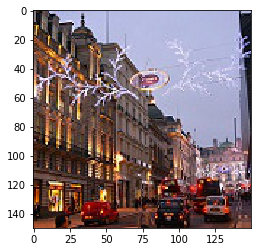

Predicted = sea, actual = glacier


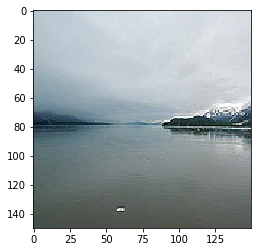

Predicted = forest, actual = street


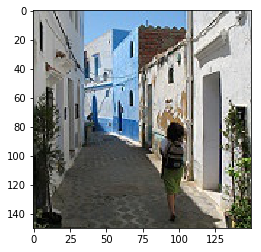

Predicted = glacier, actual = sea


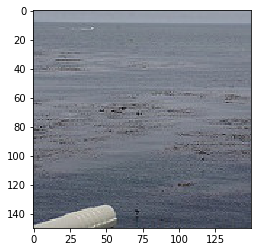

Predicted = glacier, actual = mountain


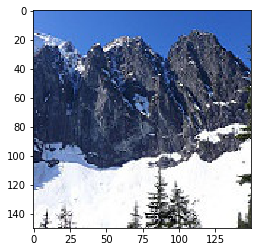

Predicted = forest, actual = glacier


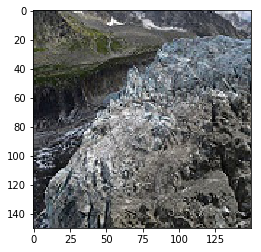

Predicted = mountain, actual = glacier


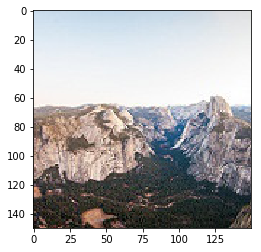

Predicted = street, actual = buildings


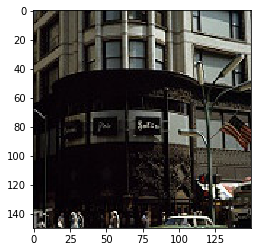

Predicted = glacier, actual = mountain


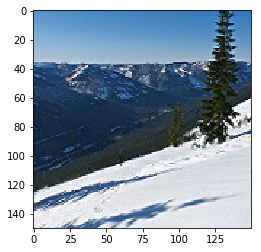

Predicted = glacier, actual = sea


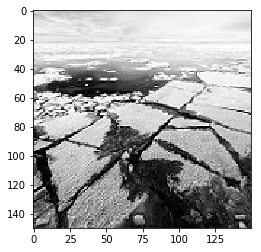

Predicted = forest, actual = buildings


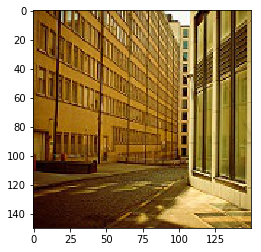

Predicted = forest, actual = buildings


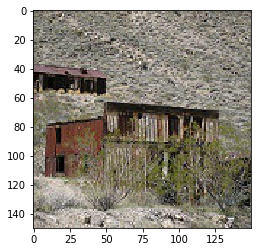

In [68]:
import matplotlib.pyplot as plt
import matplotlib.image as img
for i in range(100):
    actual = labels_valid[i]
    predicted = invertedClassDict[pred_valid[i]]
    if predicted != actual:
        print("Predicted = " + predicted + ", actual = " + actual)
        plt.imshow(images_valid[i])
        plt.show()

Predicted = forest


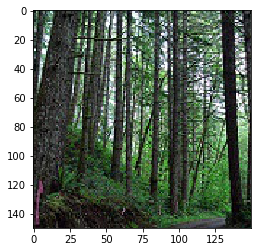

Predicted = forest


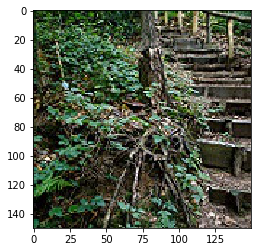

Predicted = buildings


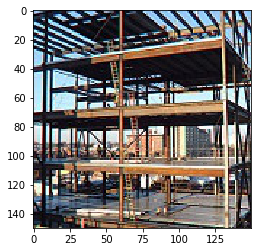

Predicted = forest


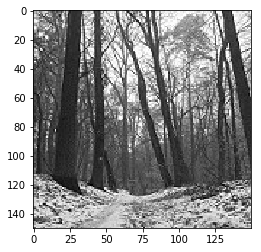

Predicted = street


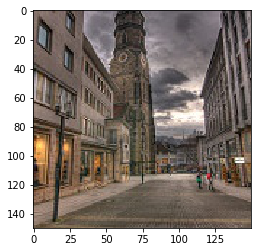

Predicted = buildings


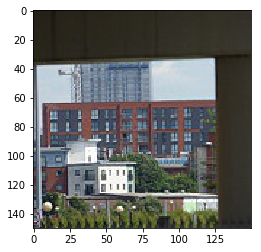

Predicted = forest


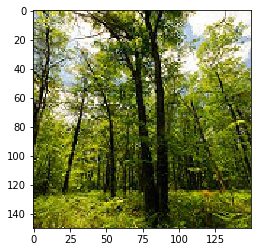

Predicted = glacier


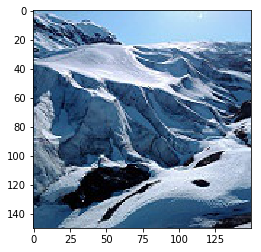

Predicted = mountain


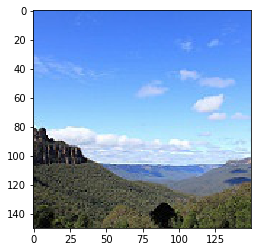

Predicted = sea


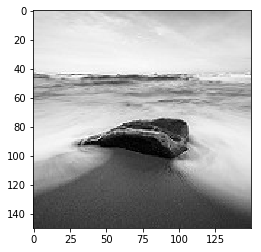

Predicted = forest


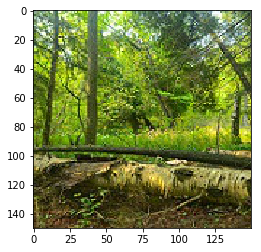

Predicted = street


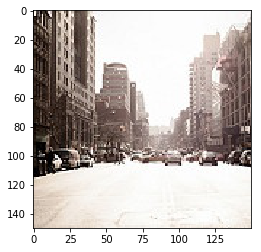

Predicted = buildings


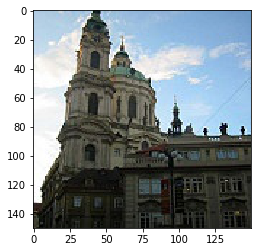

Predicted = mountain


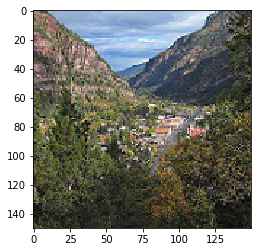

Predicted = street


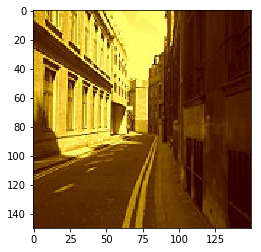

Predicted = sea


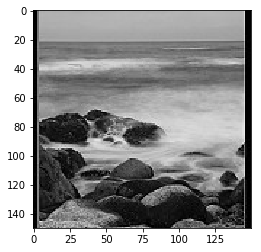

Predicted = forest


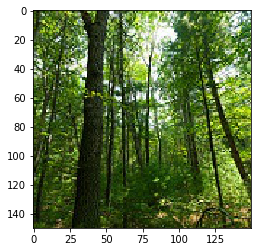

In [69]:
for i in range(20):
    actual = labels_valid[i]
    predicted = invertedClassDict[pred_valid[i]]
    if predicted == actual:
        print("Predicted = " + predicted)
        plt.imshow(images_valid[i])
        plt.show()